# CIFAR 10 - Categorical Classification

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

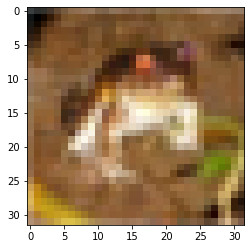

In [6]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [7]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [8]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [9]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [10]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


> ## 2) One Hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 3968개의 Nodes

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(1024, activation = 'relu'))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(256, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [14]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,081,994
Trainable params: 9,081,994
Non-trainable params: 0
______________________________________________

> ## 2) Model Compile

* 모델 학습방법 설정

In [15]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [16]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 2.3221 - accuracy: 0.2045 - val_loss: 1.9581 - val_accuracy: 0.2701
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 1.9060 - accuracy: 0.3094 - val_loss: 1.8466 - val_accuracy: 0.3290
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 1.8103 - accuracy: 0.3490 - val_loss: 1.8095 - val_accuracy: 0.3404
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 1.7299 - accuracy: 0.3784 - val_loss: 1.8735 - val_accuracy: 0.3358
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 1.6755 - accuracy: 0.3999 - val_loss: 1.8442 - val_accuracy: 0.3424
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 1.6340 - accuracy: 0.4172 - val_loss: 1.6755 - val_accuracy: 0.3974
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 1.5971 - accuracy: 0.4304 - val_loss: 1.6849 - val_accuracy:

313/313 [==============================] - 3s 11ms/step - loss: 0.8721 - accuracy: 0.7063 - val_loss: 3.0432 - val_accuracy: 0.4933
Epoch 58/100
313/313 [==============================] - 3s 11ms/step - loss: 0.8279 - accuracy: 0.7135 - val_loss: 3.3596 - val_accuracy: 0.5017
Epoch 59/100
313/313 [==============================] - 3s 11ms/step - loss: 0.8131 - accuracy: 0.7192 - val_loss: 4.1813 - val_accuracy: 0.4955
Epoch 60/100
313/313 [==============================] - 3s 11ms/step - loss: 0.8303 - accuracy: 0.7191 - val_loss: 3.6882 - val_accuracy: 0.5021
Epoch 61/100
313/313 [==============================] - 3s 11ms/step - loss: 0.8063 - accuracy: 0.7255 - val_loss: 3.1742 - val_accuracy: 0.4979
Epoch 62/100
313/313 [==============================] - 3s 11ms/step - loss: 0.7979 - accuracy: 0.7319 - val_loss: 4.3440 - val_accuracy: 0.4944
Epoch 63/100
313/313 [==============================] - 3s 11ms/step - loss: 0.7997 - accuracy: 0.7266 - val_loss: 4.3846 - val_accuracy: 0.512

> ## 4) 학습 결과 시각화

* Loss Visualization

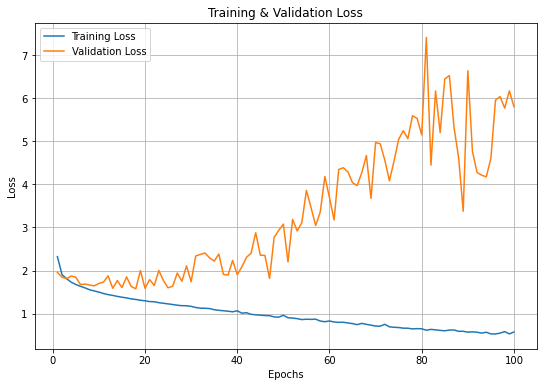

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [18]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 4.1670 - accuracy: 0.4874
Loss = 4.16700
Accuracy = 0.48740


> ## 6) Model Predict

* Probability

In [19]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1,:]))

[[0.000036045 0.000001378 0.000013863 0.667873    0.32482177  0.004994268 0.001847676 0.000000021 0.000411722 0.000000212]]


* Class

In [20]:
print(CIFAR.predict_classes(X_test[:1,:]))

[3]
